## Student Details

In [1]:
#Student Names: Aman Anand and Lokesh Mishra
#Student Reg. No.: 19BCE0521 & 19BCE2672
#Course and Slot: Web Mining_CSE3024 (L39+L40)
#Faculty: Shashank Mouli Satapathy

### Imported Libraries

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

### Question 1
##### Write a python program to calculate the degree prestige, proximity prestige and rank prestige using a graph dataset given in the following link.
##### http://snap.stanford.edu/data/wiki-Vote.txt.gz

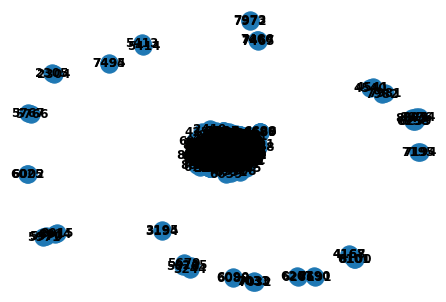

In [4]:
#Create graph
d = nx.Graph()
#Read edges
edges = nx.read_edgelist('Wiki-Vote.txt')
d.add_edges_from(edges.edges())
#Draw the graph
nx.draw(d, with_labels=True, font_weight='bold')
plt.savefig("filename.png")

###### Degree Prestige

In [5]:
n_nodes = 7115
degree_prestige = dict((v,len(d.edges(v))/(n_nodes-1)) for v in d.nodes())
print("DEGREE PRESTIGE :\n")
nodes = list(degree_prestige)
#printing 50 degree prestige values
for i in range(50):
    print(str(nodes[i]) + ' : ' + str(degree_prestige[nodes[i]]))

DEGREE PRESTIGE :

30 : 0.003935901040202418
1412 : 0.004076468934495361
3352 : 0.06705088557773405
5254 : 0.040905257239246554
5543 : 0.03696935619904414
7478 : 0.012932246274950801
3 : 0.007168962608940118
25 : 0.012651110486364914
4 : 0.004076468934495361
5 : 0.0032330615687377003
6 : 0.04413831880798426
7 : 0.0033736294630306437
8 : 0.030503233061568737
9 : 0.011385999437728422
10 : 0.013916221535001405
11 : 0.10444194545965702
12 : 0.009136913129041326
13 : 0.0015462468372223785
14 : 0.01602473994939556
15 : 0.056648861400056226
16 : 0.0021085184143941524
17 : 0.006325555243182457
18 : 0.0016868147315153219
19 : 0.00801236997469778
20 : 0.02628619623278043
21 : 0.010683159966263706
22 : 0.000281135788585887
23 : 0.012932246274950801
24 : 0.04343547933651954
173 : 0.046949676693843125
199 : 0.002389654202980039
150 : 0.007309530503233062
646 : 0.002389654202980039
853 : 0.007028394714647174
946 : 0.02291256676974979
996 : 0.04174866460500422
1006 : 0.02206915940399213
1009 : 0.0061

###### Proximity Prestige

In [6]:
x=list(d.nodes)
distance=[]
for i in range(0,500) :
    temp_dis = 0
    n = 0
    for j in range(0,500):
        if(nx.has_path(d,x[i],x[j]) == True):
            temp_dis = temp_dis + nx.shortest_path_length(d,source = x[j],target = x[i])
            n = n + 1
    if temp_dis == 0:
        distance.append([x[i], 0])
    else:
        distance.append([x[i], temp_dis/(n - 1)])
        
print("\nPROXIMITY PRESTIGE :\n")
#printing 50 proximity prestiges
for i in range(50):
    print(str(distance[i][0]) + " : " + str(distance[i][1]))


PROXIMITY PRESTIGE :

30 : 1.9438877755511021
1412 : 2.2725450901803605
3352 : 1.1182364729458918
5254 : 1.8877755511022045
5543 : 1.9639278557114228
7478 : 2.038076152304609
3 : 2.4869739478957915
25 : 2.408817635270541
4 : 2.7334669338677355
5 : 2.68937875751503
6 : 2.030060120240481
7 : 2.68937875751503
8 : 2.1382765531062122
9 : 2.585170340681363
10 : 2.2725450901803605
11 : 1.593186372745491
12 : 2.302605210420842
13 : 2.7955911823647295
14 : 2.0521042084168335
15 : 1.8096192384769538
16 : 2.4308617234468937
17 : 2.653306613226453
18 : 2.723446893787575
19 : 2.32064128256513
20 : 2.0
21 : 2.346693386773547
22 : 2.9018036072144286
23 : 2.2685370741482966
24 : 1.8356713426853708
173 : 1.9318637274549098
199 : 2.649298597194389
150 : 2.1743486973947896
646 : 2.4268537074148298
853 : 2.158316633266533
946 : 1.9599198396793587
996 : 1.8496993987975952
1006 : 2.0200400801603204
1009 : 2.2945891783567136
1210 : 1.9258517034068137
1235 : 2.6012024048096194
1248 : 2.06813627254509
1278 : 

###### Rank Prestige

In [7]:
prominance = np.random.randint(1, 4, size=n_nodes)
rank_prestige = np.zeros([n_nodes], dtype = int)
path_matrix = np.zeros([n_nodes, n_nodes], dtype = int)
i = 0
j = 0
for src in d.nodes:
    for dest in d.nodes:
        if d.has_edge(dest, src):
            path_matrix[i][j] = 1
        j = j+1
    j = 0
    i = i+1
for i in range(n_nodes):
    pr_i = 0
    for j in range(n_nodes):
        pr_i = pr_i + path_matrix[i][j] * prominance[j]
    rank_prestige[i] = pr_i
print("\nRANK PRESTIGE :\n")
print(rank_prestige)


RANK PRESTIGE :

[ 62  59 946 ...   6   3   3]


### Question 2
##### Write a python program to show the implementation Page Rank algorithm for the following graph. Update and display the page rank for all the nodes after each iteration. Count and display the total number of iterations required to meet the stopping criteria. (stopping criteria:- ε = 0.05, damping factor = 0.9)
![Page Rank Graph](WMimg1.jpg)

In [8]:
n_node = 6

def matrix_sto(M):
    for row in range(n_node):
        sum = 0
        flag = True
        for col in range(n_node):
            sum = sum + M[row][col]
            if M[row][col] < 0:
                flag=False
            
        if sum != 1 or type(sum)==complex or flag==False:
            for col in range(n_node):
                M[row][col] = 1/n_node
    return (M)


def calc_rank(M,d,epsilon):
    Stoc_M = matrix_sto(M)
    Stoc_M = np.array(Stoc_M)
    MTrans = np.transpose(Stoc_M)
    P0 = np.full((n_node, 1), 1/n_node)
    last = np.copy(P0)
    e = np.full((n_node, 1), 1)
    c = 0
    E = np.dot(e, np.transpose(e))
    factor = ((1 - d)/n_node)*E + d*MTrans
    flag=True
    iterations = 0
    while flag==True:
        iterations = iterations + 1
        current = np.dot(factor,last)
        print("Page Rank for all Nodes after Iteration # " + str(iterations))
        print(current)
        print("\n")
        for n in range(n_node):
            if abs(current[n,0] - last[n,0]) > epsilon:
                c = c + 1
        if c==0:
            flag = False
        last = current
        c = 0
    return current

def printmatrix(matrix):
    r,c = len(matrix),len(matrix[0])
    print("\n\nThe adjacency matrix is: ")
    print("\n")
    for i in range(r):
        for j in range(c):
            print(matrix[i][j],end=" ")
        print()
        
print("Input the graph in terms of Vertices and Edges as well as the connected vertice pairs-->")
v,e = map(int,input().split())
matrix = [[0]*v for i in range(v)]

for i in range(e):
    u,v = map(str,input().split())
    u = ord(u) - ord('A')
    v = ord(v)  - ord('A')
    matrix[u][v] = 1 # True or False in case of edge



printmatrix(matrix)

arr = calc_rank(matrix,0.85, 0.0001)
print("Final page rank: \n")
print(arr)

Input the graph in terms of Vertices and Edges as well as the connected vertice pairs-->
6 13
A B
A F
B F
C B
D B
D F
E B
E D
F A
F B
F C
F D
F E


The adjacency matrix is: 


0 1 0 0 0 1 
0 0 0 0 0 1 
0 1 0 0 0 0 
0 1 0 0 0 1 
0 1 0 1 0 0 
1 1 1 1 1 0 
Page Rank for all Nodes after Iteration # 1
[[0.11944444]
 [0.26111111]
 [0.11944444]
 [0.11944444]
 [0.11944444]
 [0.26111111]]


Page Rank for all Nodes after Iteration # 2
[[0.11275463]
 [0.21428241]
 [0.11275463]
 [0.11275463]
 [0.11275463]
 [0.33469907]]


Page Rank for all Nodes after Iteration # 3
[[0.12033642]
 [0.21617785]
 [0.12033642]
 [0.12033642]
 [0.12033642]
 [0.30247647]]


Page Rank for all Nodes after Iteration # 4
[[0.11899381]
 [0.22127977]
 [0.11899381]
 [0.11899381]
 [0.11899381]
 [0.30274499]]


Page Rank for all Nodes after Iteration # 5
[[0.11846124]
 [0.21960598]
 [0.11846124]
 [0.11846124]
 [0.11846124]
 [0.30654905]]


Page Rank for all Nodes after Iteration # 6
[[0.11877381]
 [0.21946587]
 [0.11877381]
 [0.1

### Question 3
##### Write a python program to show the implementation HITS algorithm for the above graph and display the authority as well as hub score for all the nodes after each iteration. Count and display the total number of iterations required to meet the stopping criteria. (stopping criteria:- ε = 0.05 for both hub and authority)
![HITS Graph](WMimg1.jpg)

In [13]:
def printmatrix(matrix):
   r,c = len(matrix),len(matrix[0])
   print("\n\nThe adjacency matrix is: ")
   print("\n")
   for i in range(r):
       for j in range(c):
           print(matrix[i][j],end=" ")
       print()
        
print("Input the graph in terms of Vertices and Edges as well as the connected vertice pairs-->")
v,e = map(int,input().split())
matrix = [[0]*v for i in range(v)]

for i in range(e):
    u,v = map(str,input().split())
    u = ord(u) - ord('A')
    v = ord(v)  - ord('A')
    matrix[u][v] = 1 # True or False in case of edge

printmatrix(matrix)

#initialize Ak, Hk, L and L transpose
Ak = [1,1,1,1,1,1]
Hk = [1,1,1,1,1,1]
L = matrix
Lt = np.transpose(L)

#find L.Lt and Lt.L
mult1 = np.dot(L,Lt)
mult2 = np.dot(Lt,L)

flag1 = True
flag2 = True
countvaria = 0
#start HITS Algorithm until |Ak - Akk|<0.04 and |Hk - Hkk|<0.04
while(flag1 and flag2):
    flag1 = False
    flag2 = False
    Akk = np.dot(mult1,Ak)
    countvaria += 1
    #normalization
    squares1 = np.square(Akk)
    sqsum1 = np.sum(squares1)
    sqrt1 = math.sqrt(sqsum1)
    Akk = np.divide(Akk, sqrt1)
    Hkk = np.dot(mult2,Hk)
    
    #normalization
    squares2 = np.square(Hkk)
    sqsum2 = np.sum(squares2)
    sqrt2 = math.sqrt(sqsum2)
    Hkk = np.divide(Hkk, sqrt2)
    
    #check if values are lesser than threshold
    for i in range(6):
        if(abs(Akk[i]-Ak[i])>0.05):
            flag1 = True
            break
    
    for i in range(6):
        if(abs(Hkk[i]-Hk[i])>0.05):
            flag2 = True
            break
    
    Ak = Akk
    Hk = Hkk
    print("\n\nIteration #"+str(countvaria))
    print("Authority Score for each node: -->   {}".format(Ak))
    print("Hub Score for each node: -->   {}".format(Hk))



Input the graph in terms of Vertices and Edges as well as the connected vertice pairs-->
6 13
A B
A F
B F
C B
D B
D F
E B
E D
F A
F B
F C
F D
F E


The adjacency matrix is: 


0 1 0 0 0 1 
0 0 0 0 0 1 
0 1 0 0 0 0 
0 1 0 0 0 1 
0 1 0 1 0 0 
1 1 1 1 1 0 


Iteration #1
Authority Score for each node: -->   [0.45363838 0.17011439 0.28352399 0.45363838 0.39693358 0.56704798]
Hub Score for each node: -->   [0.29210312 0.70104749 0.29210312 0.40894437 0.29210312 0.29210312]


Iteration #2
Authority Score for each node: -->   [0.41847333 0.13949111 0.27898222 0.41847333 0.40379005 0.62403917]
Hub Score for each node: -->   [0.25629192 0.74626178 0.25629192 0.39951388 0.25629192 0.29398191]


In [69]:
print("Final Authority Score for all Nodes: -->\n")
print("Site ordering - Wikipedia, Bing, Rediff, Altavista, Yahoo, Google")
Akk

Final Authority Score for all Nodes: -->

Site ordering - Wikipedia, Bing, Rediff, Altavista, Yahoo, Google


array([0.41847333, 0.13949111, 0.27898222, 0.41847333, 0.40379005,
       0.62403917])

In [70]:
print("Final Hub Score for all Nodes: -->\n")
print("Site ordering - Wikipedia, Bing, Rediff, Altavista, Yahoo, Google")
Hkk

Final Hub Score for all Nodes: -->

Site ordering - Wikipedia, Bing, Rediff, Altavista, Yahoo, Google


array([0.25629192, 0.74626178, 0.25629192, 0.39951388, 0.25629192,
       0.29398191])

### Question 4
##### Write a python program to calculate the maximum flow in the following graph using Ford-Fulkerson Max flow algorithm.
##### Display the augmented graph after each step. Display the value for each edge in the form of [flow / capacity]. Display the final result using the format given below using pandas.
![Ford-Fulkerson Max Flow Graph](WMimg2.jpg)

In [71]:
# Ford-Fulkerson algorith in Python
N = 6
parentTracker = []
INFINITE = 9999999999
def BreadthFirstSearch(residualGraph, source, sink, parentTracker):
    
    queue = []
    visited = []
    
    for i in range(0,N):
        visited.append(0)
    
    queue.append(source)
    visited[source] = True
    parentTracker[source] = -1
    
    while not len(queue) == 0:
        u = queue.pop(0)
        for v in range(0,N):
            if visited[v] == False and residualGraph[u][v] > 0:
                queue.append(v)
                visited[v] = True
                parentTracker[v] = u
                
    if visited[sink]:
        return True
    else:
        return False

 
def print_graph(graph):
    
    maxFlowGraph = nx.DiGraph()
    maxFlowGraph.add_nodes_from('012345')
    L  =[
            ('0', '1', {'capacity': 16, 'flow': 0}),
            ('0', '2', {'capacity': 13, 'flow': 0}),
            ('1', '3', {'capacity': 12, 'flow': 0}),
            ('1', '2', {'capacity': 10, 'flow': 0}),
            ('2', '4', {'capacity': 14, 'flow': 0}),
            ('2', '1', {'capacity': 4, 'flow': 0}),
            ('3', '5', {'capacity': 20, 'flow': 0}),
            ('3', '2', {'capacity': 9, 'flow': 0}),
            ('4', '3', {'capacity': 7, 'flow': 0}),
            ('4', '5', {'capacity': 4, 'flow': 0}),
    ]
    
    
    maxFlowLayout = {
        '0': [0, 2], '1': [1, 4], '2': [1, 0], '3': [2, 4],
        '4': [2, 0], '5': [3, 2], 
    }
        
    for i in L:
        row = int(i[0])
        col = int(i[1])
        i[2]['flow'] = i[2]['capacity'] - graph[row][col] 
    maxFlowGraph.add_edges_from(L)
    plt.figure(figsize=(5, 5))                           #scale of the graph.
    plt.axis('off')                                      #Turning off the axis.
    #Using networkx functions to plot the graph and add colour.
    nx.draw_networkx_nodes(maxFlowGraph, maxFlowLayout, node_color='royalblue', node_size=450)
    nx.draw_networkx_edges(maxFlowGraph, maxFlowLayout, edge_color='black')
    nx.draw_networkx_labels(maxFlowGraph, maxFlowLayout, font_color='white')
    for nextNode, currentNode, cf in maxFlowGraph.edges(data=True):
        label = '{}/{}'.format(cf['flow'], cf['capacity'])
        color = 'green' if cf['flow'] < cf['capacity'] else 'red'
        x = maxFlowLayout[nextNode][0] * .6 + maxFlowLayout[currentNode][0] * .4
        y = maxFlowLayout[nextNode][1] * .6 + maxFlowLayout[currentNode][1] * .4
        t = plt.text(x, y, label, size=16, color=color, 
                     horizontalalignment='center', verticalalignment='center')
        
    plt.show()
    


def FordFulkersonAlgorithm(graph, source, sink):
    
    u,v = 0,0
    fin_dict = {}
    residualGraph = graph
    maxFlow = 0
    countvar = 0
    while BreadthFirstSearch(residualGraph, source, sink, parentTracker):
        pathFlow = INFINITE
        v = sink
        countvar += 1
        while not v == source:
            u = parentTracker[v]
            pathFlow = min(pathFlow, residualGraph[u][v])
            v = parentTracker[v]
            
        v = sink
        s = ""
        while not v == source:
            s = " -> " + str(v) + s
            u = parentTracker[v]
            residualGraph[u][v] -= pathFlow
            v = parentTracker[v]
        s = "0" + s
        fin_dict[s] = pathFlow
        maxFlow += pathFlow
        print("\n")
        print("Iteration #" + str(countvar))
        print("\n")
        print("Augmented Path:  "+ s)
        print("Bottleneck Capacity:  " + str(pathFlow))
        print("\nAugmented Graph -->")
        print_graph(residualGraph)
    print("\n\n\n")
    print("Tabular Format of Representation ")
    cols=['Augmented Path','Bottleneck Capacity']
    df = pd.DataFrame(list(fin_dict.items()), columns = cols)
    print(df)
    return maxFlow
    
def main():
    graph = \
        [
            [0, 16, 13, 0, 0, 0],
            [0, 0, 10, 12, 0, 0],
            [0, 4, 0, 0, 14, 0],
            [0, 0, 9, 0, 0, 20],
            [0, 0, 0, 7, 0, 4],
            [0, 0, 0, 0, 0, 0]
        ]
        
    for i in range(0,N):
        parentTracker.append(0)
        
    print("\nThe Maximum Possible Flow is: {}".format(FordFulkersonAlgorithm(graph, 0, N - 1)))



Iteration #1


Augmented Path:  0 -> 1 -> 3 -> 5
Bottleneck Capacity:  12

Augmented Graph -->


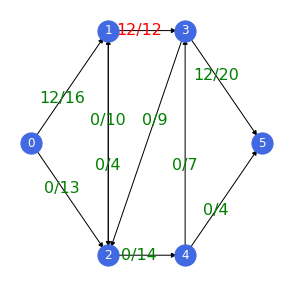



Iteration #2


Augmented Path:  0 -> 2 -> 4 -> 5
Bottleneck Capacity:  4

Augmented Graph -->


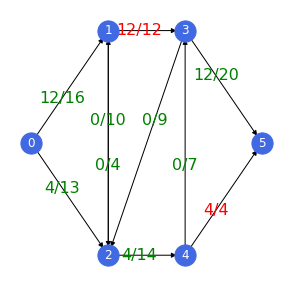



Iteration #3


Augmented Path:  0 -> 2 -> 4 -> 3 -> 5
Bottleneck Capacity:  7

Augmented Graph -->


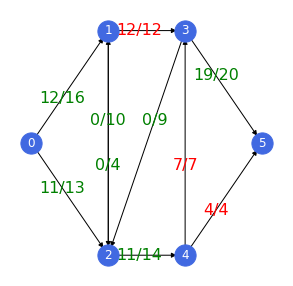





Tabular Format of Representation 
          Augmented Path  Bottleneck Capacity
0       0 -> 1 -> 3 -> 5                   12
1       0 -> 2 -> 4 -> 5                    4
2  0 -> 2 -> 4 -> 3 -> 5                    7

The Maximum Possible Flow is: 23


In [72]:
main()